Introduction
---------------

Name: MD. Sazib Ahmed

ID: 20-42076-1

Course: COMPUTER VISION & PATTERN RECOGNITION

Section: C

Assignment: Final Term Assignment 2(Face Mask Detection)


Problem Statement:
------------------------
Real-time Face Mask Detection: Develop a facial mask detection model using deep learning architectures such as AlexNet, VGG, or ResNet. Following the model training, save the model for later use. In the face mask detection phrase, perform face detection using pre-trained transfer learning models and crop the facial are from the video feed captured by a camera, utilizing techniques like media pipelines or OpenCV's Haarcascade. Subsequently, in real-time, determine whether individuals are wearing masks or not.




# Phase 1: Development of a Face Mask Detection Model using MobileNetV2 for Subsequent Real-time Deployment




## Importing the necessary packages
This is the step where various libraries and modules are brought into the program. These packages provide pre-built functions and tools that will be used throughout the code. They include libraries for working with neural networks, image processing, data handling, and more. This step is crucial to access and use the required functionalities efficiently in the code.



In [21]:

# Import the necessary packages
import warnings
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import tensorflow as tf
from imutils import paths
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report




## Step 1: Load and preprocess the dataset
This is the step where images are loaded from a dataset directory and prepared for training a machine learning model. The images are resized to a consistent size, converted into numerical format suitable for a neural network, and preprocessed to make them compatible with the chosen model. The images are organized into data and labeled with categories, forming the basis for training the mask detection model.



Step 1: Loading and preprocessing images...
Visualizing 10 random images from each category


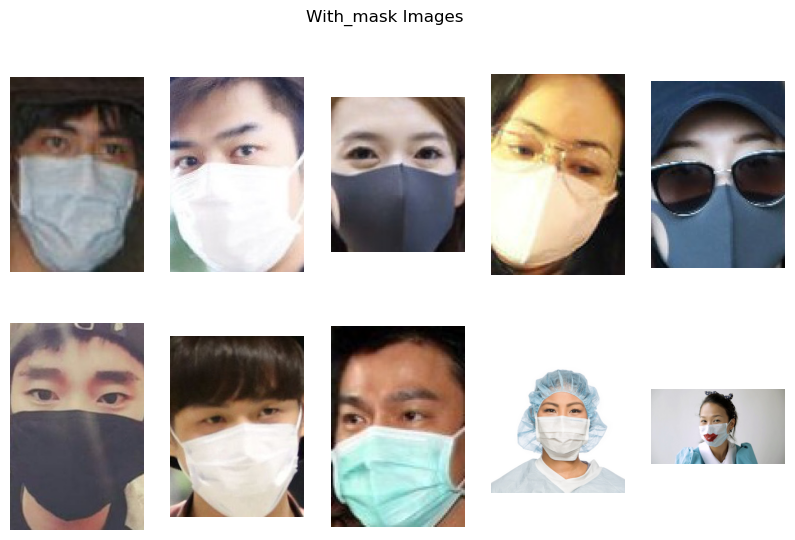

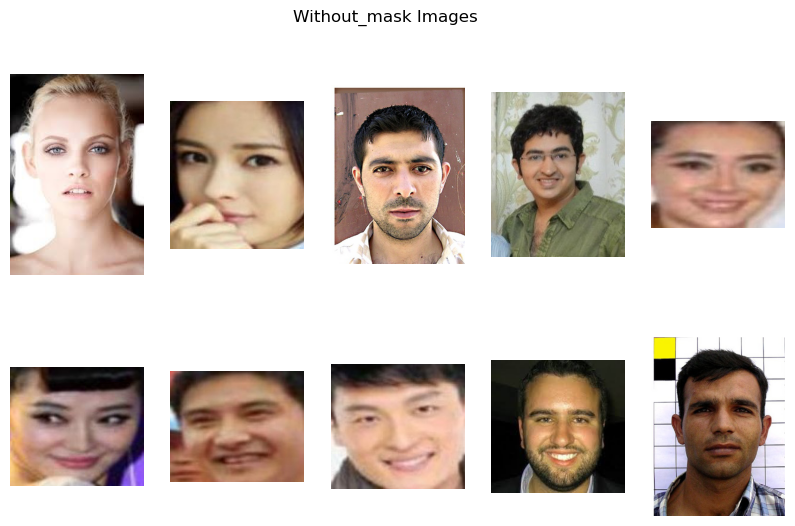

Step 1: Successfully Completed


In [22]:


# Set the initial learning rate for model training
INITIAL_LEARNING_RATE = 0.0001

# Define the number of training epochs
NUM_EPOCHS = 20

# Specify the batch size for training
BATCH_SIZE = 32

DIRECTORY = "dataset"
CATEGORIES = ["with_mask", "without_mask"]

print("Step 1: Loading and preprocessing images...")

warnings.filterwarnings("ignore", category=UserWarning)

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(160, 160))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

print("Visualizing 10 random images from each category")

# Visualize 10 random images from each category
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    image_paths = [os.path.join(path, img) for img in os.listdir(path)]
    random_images = random.sample(image_paths, 10)
    
    plt.figure(figsize=(10, 6))
    plt.suptitle(category.capitalize() + " Images")
    
    for i, image_path in enumerate(random_images, 1):
        img = plt.imread(image_path)
        plt.subplot(2, 5, i)
        plt.imshow(img)
        plt.axis("off")
    
    plt.show()

print("Step 1: Successfully Completed")




## Step 2: Split the dataset into train and test sets
This step involves dividing the collected data into two separate parts: the training set and the test set. The training set is used to train the machine learning model, and the test set is used to evaluate its performance. This step ensures that the model is not only learning from the same data it will be tested on, helping to assess its real-world accuracy and generalization ability.



In [23]:

print("Step 2: Splitting dataset into train and test sets...")

(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

print("Step 2: Successfully Completed")



Step 2: Splitting dataset into train and test sets...
Step 2: Successfully Completed



## Step 3: Data augmentation using ImageDataGenerator
This is a technique to artificially expand the size of the training dataset by applying various transformations to the existing images. These transformations can include rotations, zooming, shifts, flips, and more. By creating new variations of the images, the model becomes more robust and better able to handle different scenarios, improving its ability to generalize well on unseen data.



In [24]:

print("Step 3: Data augmentation...")

aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

print("Step 3: Successfully Completed")



Step 3: Data augmentation...
Step 3: Successfully Completed



## Step 4: Load MobileNetV2 base model
This step involves importing and utilizing a pre-trained deep learning model called MobileNetV2. This model has already been trained on a large dataset and can understand high-level features within images. By loading this model without its fully connected layers, we can leverage its feature extraction abilities and then customize the top layers for our specific classification task. This approach helps to save time and computational resources during training.



In [25]:

print("Step 4: Loading MobileNetV2 base model...")

baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(160, 160, 3)))

print("Step 4: Successfully Completed")




Step 4: Loading MobileNetV2 base model...
Step 4: Successfully Completed



## Step 5: Construct the head model on top of the base model
This involves creating a new neural network structure that will be attached to the previously loaded MobileNetV2 base model. This newly added structure is known as the "head" of the model. It typically consists of fully connected layers that are customized for the specific classification task. This customization includes determining the output classes, adding dropout layers to prevent overfitting, and defining activation functions. The combined model with the base and head forms the complete architecture that will be trained for the desired classification.



In [26]:

print("Step 5: Constructing head model...")

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(3, 3))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

print("Step 5: Successfully Completed")



Step 5: Constructing head model...
Step 5: Successfully Completed



## Step 6: Combine base model with head model
This step refers to the process of connecting the customized head model, which contains layers for classification, to the pre-trained base model. This combination creates a complete neural network architecture that can take input data, pass it through the base model's feature extraction layers, and then through the custom head layers for classification. The base model extracts relevant features from the input data, and the head model interprets these features to make predictions. This combined model will be trained on the dataset to learn how to classify images according to the task's requirements.



In [27]:
print("Step 6: Combining base model with head model...")

model = Model(inputs=baseModel.input, outputs=headModel)
model.summary()

print("Step 6: Successfully Completed")



Step 6: Combining base model with head model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32

 block_3_expand_relu (ReLU)  (None, 40, 40, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 41, 41, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 20, 20, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 20, 20, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 10, 10, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 10, 10, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 10, 10, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 10, 10, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 10, 10, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 10, 10, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 10, 10, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 10, 10, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 10, 10, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 11, 11, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 5, 5, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 5, 5, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 5, 5, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 5, 5, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

# Step 7: Freeze layers in the base model
This step involves preventing the weights of the pre-trained layers in the base model from being updated during training. This ensures that the valuable features learned by the base model from a different task are preserved. Only the additional layers added for the specific classification task will be trained to adapt to the new problem. This strategy helps to retain important pre-trained information while fine-tuning the model for the new task

In [28]:

print("Step 7: Freezing layers in the base model...")

for layer in baseModel.layers:
    layer.trainable = False
    
print("Step 7: Successfully Completed")

    

Step 7: Freezing layers in the base model...
Step 7: Successfully Completed



# Step 8: Compile the model
This step involves configuring the model for training. This step specifies the loss function and optimization algorithm to be used during the training process. The loss function quantifies the difference between predicted and actual values, guiding the model to improve its predictions. The optimization algorithm updates the model's weights to minimize the loss function. 

In [29]:

print("Step 8: Compiling the model...")

opt = tf.keras.optimizers.legacy.Adam(lr=INITIAL_LEARNING_RATE, decay=INITIAL_LEARNING_RATE / NUM_EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

print("Step 8: Successfully Completed")



Step 8: Compiling the model...
Step 8: Successfully Completed



# Step 9: Train the model
This step refers to the process of feeding the prepared dataset into the model and adjusting its parameters (weights and biases) based on the training data. During this step, the model learns to make accurate predictions by iteratively updating its parameters using the optimization algorithm. The training data is passed through the network, and the predicted outputs are compared to the actual labels. The optimization algorithm then calculates the error and adjusts the model's parameters to minimize this error. This process is repeated for a specified number of epochs (iterations) to improve the model's performance.



In [30]:

print("Step 9: Training the model...")

H = model.fit(
    aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
    steps_per_epoch=len(trainX) // BATCH_SIZE,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BATCH_SIZE,
    epochs=NUM_EPOCHS)

model.summary()

print("Step 9: Successfully Completed")



Step 9: Training the model...
Epoch 1/20
95/95 [==============================] - 19s 184ms/step - loss: 0.4570 - accuracy: 0.8151 - val_loss: 0.1206 - val_accuracy: 0.9752
Epoch 2/20
95/95 [==============================] - 15s 161ms/step - loss: 0.1852 - accuracy: 0.9436 - val_loss: 0.0800 - val_accuracy: 0.9817
Epoch 3/20
95/95 [==============================] - 19s 200ms/step - loss: 0.1378 - accuracy: 0.9572 - val_loss: 0.0662 - val_accuracy: 0.9857
Epoch 4/20
95/95 [==============================] - 14s 146ms/step - loss: 0.1083 - accuracy: 0.9641 - val_loss: 0.0570 - val_accuracy: 0.9883
Epoch 5/20
95/95 [==============================] - 14s 145ms/step - loss: 0.1005 - accuracy: 0.9684 - val_loss: 0.0536 - val_accuracy: 0.9870
Epoch 6/20
95/95 [==============================] - 13s 136ms/step - loss: 0.0846 - accuracy: 0.9730 - val_loss: 0.0506 - val_accuracy: 0.9896
Epoch 7/20
95/95 [==============================] - 13s 132ms/step - loss: 0.0801 - accuracy: 0.9763 - val_loss:

                                                                                                  
 block_2_expand_BN (BatchNo  (None, 40, 40, 144)          576       ['block_2_expand[0][0]']      
 rmalization)                                                                                     
                                                                                                  
 block_2_expand_relu (ReLU)  (None, 40, 40, 144)          0         ['block_2_expand_BN[0][0]']   
                                                                                                  
 block_2_depthwise (Depthwi  (None, 40, 40, 144)          1296      ['block_2_expand_relu[0][0]'] 
 seConv2D)                                                                                        
                                                                                                  
 block_2_depthwise_BN (Batc  (None, 40, 40, 144)          576       ['block_2_depthwise[0][0]']   
 hNormaliz

                                                                                                  
 block_5_depthwise_BN (Batc  (None, 20, 20, 192)          768       ['block_5_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_5_depthwise_relu (Re  (None, 20, 20, 192)          0         ['block_5_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_5_project (Conv2D)    (None, 20, 20, 32)           6144      ['block_5_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_5_p

                                                                    ']                            
                                                                                                  
 block_8_project_BN (BatchN  (None, 10, 10, 64)           256       ['block_8_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_8_add (Add)           (None, 10, 10, 64)           0         ['block_7_add[0][0]',         
                                                                     'block_8_project_BN[0][0]']  
                                                                                                  
 block_9_expand (Conv2D)     (None, 10, 10, 384)          24576     ['block_8_add[0][0]']         
                                                                                                  
 block_9_e

                                                                                                  
 block_12_expand_BN (BatchN  (None, 10, 10, 576)          2304      ['block_12_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_12_expand_relu (ReLU  (None, 10, 10, 576)          0         ['block_12_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_12_depthwise (Depthw  (None, 10, 10, 576)          5184      ['block_12_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_12_

 )                                                                                                
                                                                                                  
 block_15_depthwise (Depthw  (None, 5, 5, 960)            8640      ['block_15_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_15_depthwise_BN (Bat  (None, 5, 5, 960)            3840      ['block_15_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_15_depthwise_relu (R  (None, 5, 5, 960)            0         ['block_15_depthwise_BN[0][0]'
 eLU)                                                               ]                             
          


# Step 10: Evaluate the model
This step involves assessing the trained model's performance using a separate dataset that it hasn't seen during training. This step helps determine how well the model generalizes to new, unseen data. The model's predictions are compared to the true labels of the evaluation dataset, and various metrics such as accuracy, precision, recall, and F1-score are calculated to measure its performance. This evaluation provides insights into how effectively the model can make predictions on real-world data and helps identify potential areas for improvement.



In [32]:

print("Step 10: Evaluating the model...")

predIdxs = model.predict(testX, batch_size=BATCH_SIZE)
predIdxs = np.argmax(predIdxs, axis=1)

print("Step 10: Successfully Completed")



Step 10: Evaluating the model...
24/24 [==============================] - 2s 89ms/step
Step 10: Successfully Completed



# Step 11: Display classification report
This step involves assessing the trained model's performance using a separate dataset that it hasn't seen during training. This step helps determine how well the model generalizes to new, unseen data. The model's predictions are compared to the true labels of the evaluation dataset, and various metrics such as accuracy, precision, recall, and F1-score are calculated to measure its performance. This evaluation provides insights into how effectively the model can make predictions on real-world data and helps identify potential areas for improvement.


In [33]:

print("Step 11: Displaying classification report...")

print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

print("Step 11: Successfully Completed")



Step 11: Displaying classification report...
              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.98       383
without_mask       0.99      0.98      0.98       384

    accuracy                           0.98       767
   macro avg       0.98      0.98      0.98       767
weighted avg       0.98      0.98      0.98       767

Step 11: Successfully Completed



# Step 12: Serialize the model to disk
This step refers to saving the trained machine learning model to a file on the computer's storage. Serialization is the process of converting the model's structure and learned parameters into a format that can be stored, shared, and later loaded for future use. This step is crucial because it allows you to preserve the trained model's configuration and the knowledge it has gained during training. By saving the model to disk, you can easily retrieve it and use it for making predictions on new data without needing to retrain it from scratch.



In [34]:

print("Step 12: Saving mask detector model...")

model.save("face_mask_detector.model", save_format="h5")

print("Step 12: Successfully Completed")



Step 12: Saving mask detector model...
Step 12: Successfully Completed



## Step 13: Plot training loss and accuracy
This step involves creating visual representations of how the model's performance changed during the training process. This is typically done by plotting the loss (error) and accuracy metrics over each epoch (training iteration). The loss plot shows how well the model is fitting the training data as training progresses, with the goal of reducing loss over time. The accuracy plot illustrates how well the model is performing on both the training and validation data sets. These plots provide insights into the model's learning progress and potential overfitting, helping to fine-tune the training process.



Step 13: Plotting training loss and accuracy...


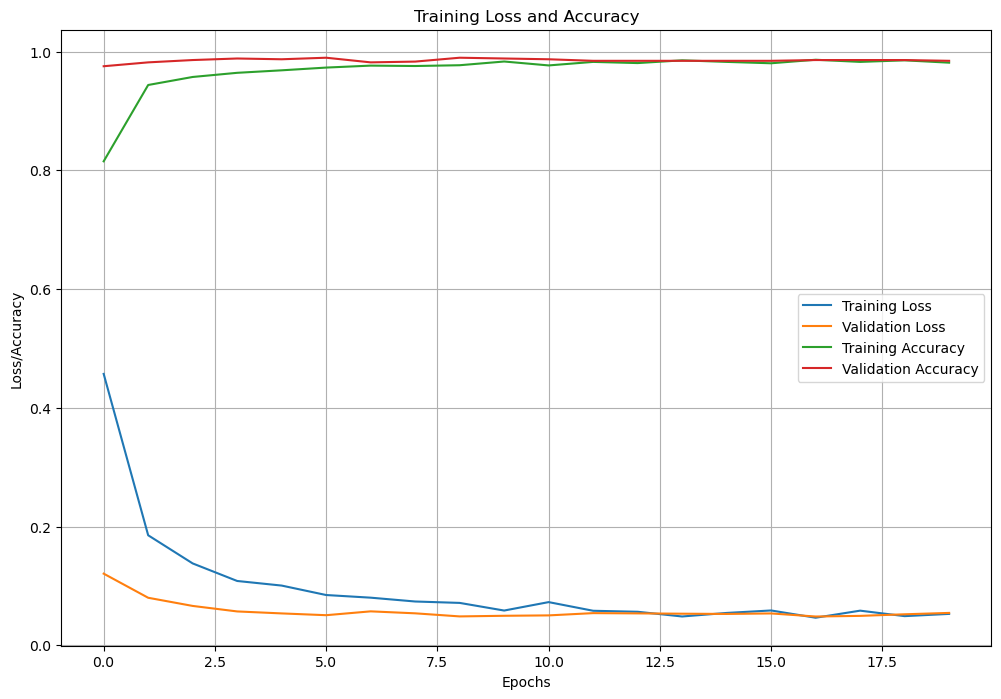

Step 13: Successfully Completed


In [35]:

print("Step 13: Plotting training loss and accuracy...")

# Number of training epochs
num_epochs = NUM_EPOCHS

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Plot training loss and validation loss
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="Training Loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="Validation Loss")

# Plot training accuracy and validation accuracy
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="Validation Accuracy")

# Add title and labels to the plot
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

print("Step 13: Successfully Completed")




# Phase 2: Real-time Face Mask Detection Implementation
This code implements a real-time face mask detection system using pre-trained models for both face detection and mask prediction. It captures video frames from the camera feed, processes them to identify faces, predicts mask presence, and provides a real-time visualization of the results.

## The steps are,
Sure, here's a short explanation of each step in the provided code:

1. **Importing Necessary Packages**: Importing the required libraries, including OpenCV, TensorFlow, and other utility packages for real-time face mask detection.

2. **Loading Face Detection Model**: Loading the pre-trained face detection model architecture and weights from files to be used for detecting faces in frames.

3. **Loading Face Mask Detection Model**: Loading the saved face mask detection model, which was trained earlier, to predict whether a face is wearing a mask or not.

4. **Initializing Video Stream**: Starting the video stream capture from the camera source.

5. **Grab the frame from the threaded video stream**: In this step, a single frame is taken from the video stream that is being captured in a separate thread.

6. **Face Detection and Mask Prediction**: Capturing a frame from the video stream, resizing it, and using the loaded face detection model to detect faces in the frame. Then, using the face mask detection model to predict whether each detected face is wearing a mask or not.

7. **Looping Over Detected Faces**: Iterating over each detected face's location and the corresponding mask prediction.

8. **Drawing Probability Bars and Labels**: Drawing probability bars on the frame to visualize the likelihood of wearing or not wearing a mask. Also, drawing bounding boxes around detected faces with labels indicating mask presence and prediction confidence.

9. **Displaying the Frame**: Displaying the processed frame with drawn bounding boxes and labels.

10. **Key Event Handling**: Continuously waiting for a key event and breaking the loop if the 'q' key is pressed.

11. **Cleaning Up**: Upon exiting the loop, releasing the video stream and closing OpenCV windows, effectively stopping the video stream and cleaning up resources.


In [19]:

# Step 1: Import the necessary packages
import time
import cv2
import os
import imutils
import time
import numpy as np
import warnings
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream

# Filter out the UserWarning related to palette images
warnings.filterwarnings("ignore", category=UserWarning)

# defining detect_and_predict_mask function
def detect_and_predict_mask(frame, faceNet, maskNet):
    """
    Detects faces in the given frame and predicts whether the individuals are wearing masks or not.
    
    Args:
        frame: Input frame (image) from the camera feed.
        faceNet: Pre-trained face detection model.
        maskNet: Pre-trained mask detection model.
    
    Returns:
        Tuple containing the face locations and corresponding mask predictions.
    """
    # Function_Step 1: Get the dimensions of the frame and create a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (160, 160), (104.0, 177.0, 123.0))
    
    # Function_Step 2: Pass the blob through the face detection network to get detections
    faceNet.setInput(blob)
    detections = faceNet.forward()
    
    # Function_Step 3: Initialize lists for faces, locations, and predictions
    faces = []
    locs = []
    preds = []
    
    # Function_Step 4: Loop over detections and filter weak ones
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (160, 160))
            face = img_to_array(face)
            face = preprocess_input(face)
            
            faces.append(face)
            locs.append((startX, startY, endX, endY))
    
    # Function_Step 5: Predict mask presence using the mask detection model
    if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)
    
    # Function_Step 6: Return face locations and mask predictions
    return (locs, preds)

# Step 2: Load our serialized face detector model from disk
prototxtPath = "pre-trained_face_detector_model/face_detection_architecture.prototxt"
weightsPath = "pre-trained_face_detector_model/face_detection_weights.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# Step 3: Load the face mask detector model from disk
maskNet = load_model("face_mask_detector.model")

# Step 4: Initialize the video stream
print("Step 4: Initializing the video stream...")
vs = VideoStream(src=0).start()

try:
    while True:
        # Step 5: Grab the frame from the threaded video stream
        frame = vs.read()
        if frame is None:
            break  # Exit the loop if no frame is captured
        frame = imutils.resize(frame, width=1920)

        # Step 6: Detect faces in the frame and determine if they are wearing a mask or not
        (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

        # Step 7: Loop over the detected face locations and their corresponding locations
        for (box, pred) in zip(locs, preds):
            # Unpack the bounding box and predictions
            (startX, startY, endX, endY) = box
            (mask, withoutMask) = pred

            # Determine the class label and color for bounding box and text
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

            # Include the probability in the label
            label_with_prob = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
            

            # Get and print the current system time
            current_time = time.strftime('%Y-%m-%d %H:%M:%S')
            print(f"Time: {current_time}")
            print(label_with_prob)
            print()

            # Step 8: Draw probability bars
            bar_startY = startY - 20
            bar_endY = startY - 5

            cv2.rectangle(frame, (startX, bar_startY), (int(startX + mask * (endX - startX)), bar_endY), (0, 255, 0), -1)
            cv2.rectangle(frame, (int(startX + mask * (endX - startX)), bar_startY), (endX, bar_endY), (0, 0, 255), -1)
            cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

            # Calculate text and background dimensions
            text_size = cv2.getTextSize(label_with_prob, cv2.FONT_HERSHEY_SIMPLEX, 0.45, 2)[0]
            rect_x = startX
            text_size = int(startX - endX)
            background_size = 20 - int(text_size * 0.14)

            # Draw a white rectangle
            cv2.rectangle(frame, (startX, startY - 20), (endX, startY - background_size), (0, 0, 0), -1)

            cv2.putText(frame, label_with_prob, (startX + 5, startY - 25),
                        cv2.FONT_HERSHEY_SIMPLEX, abs(text_size * 0.0033), color, 2)

        # Step 9: Show the output frame
        cv2.imshow("Real-time Face Mask Detection", frame)
        key = cv2.waitKey(1) & 0xFF

        # Step 10: Break from the loop if the 'q' key was pressed
        if key == ord("q"):
            break

finally:
    # Step 11: Clean up
    cv2.destroyAllWindows()
    vs.stop()
    print("Video stream stopped.")


Step 4: Initializing the video stream...
1/1 [==============================] - 0s 393ms/step
Time: 2023-08-13 00:28:44
Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:44
Mask: 100.00%

1/1 [==============================] - 0s 19ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [==============================] - 0s 19ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:45
Mask: 100.00%

1/1 [=======================

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:51
No Mask: 100.00%

1/1 [==============================] - 0s 18ms/step
Time: 2023-08-13 00:28:52
No Mask: 99.41%

1/1 [==============================] - 0s

In [ ]:
## Visualization of Screenshots During Program Execution

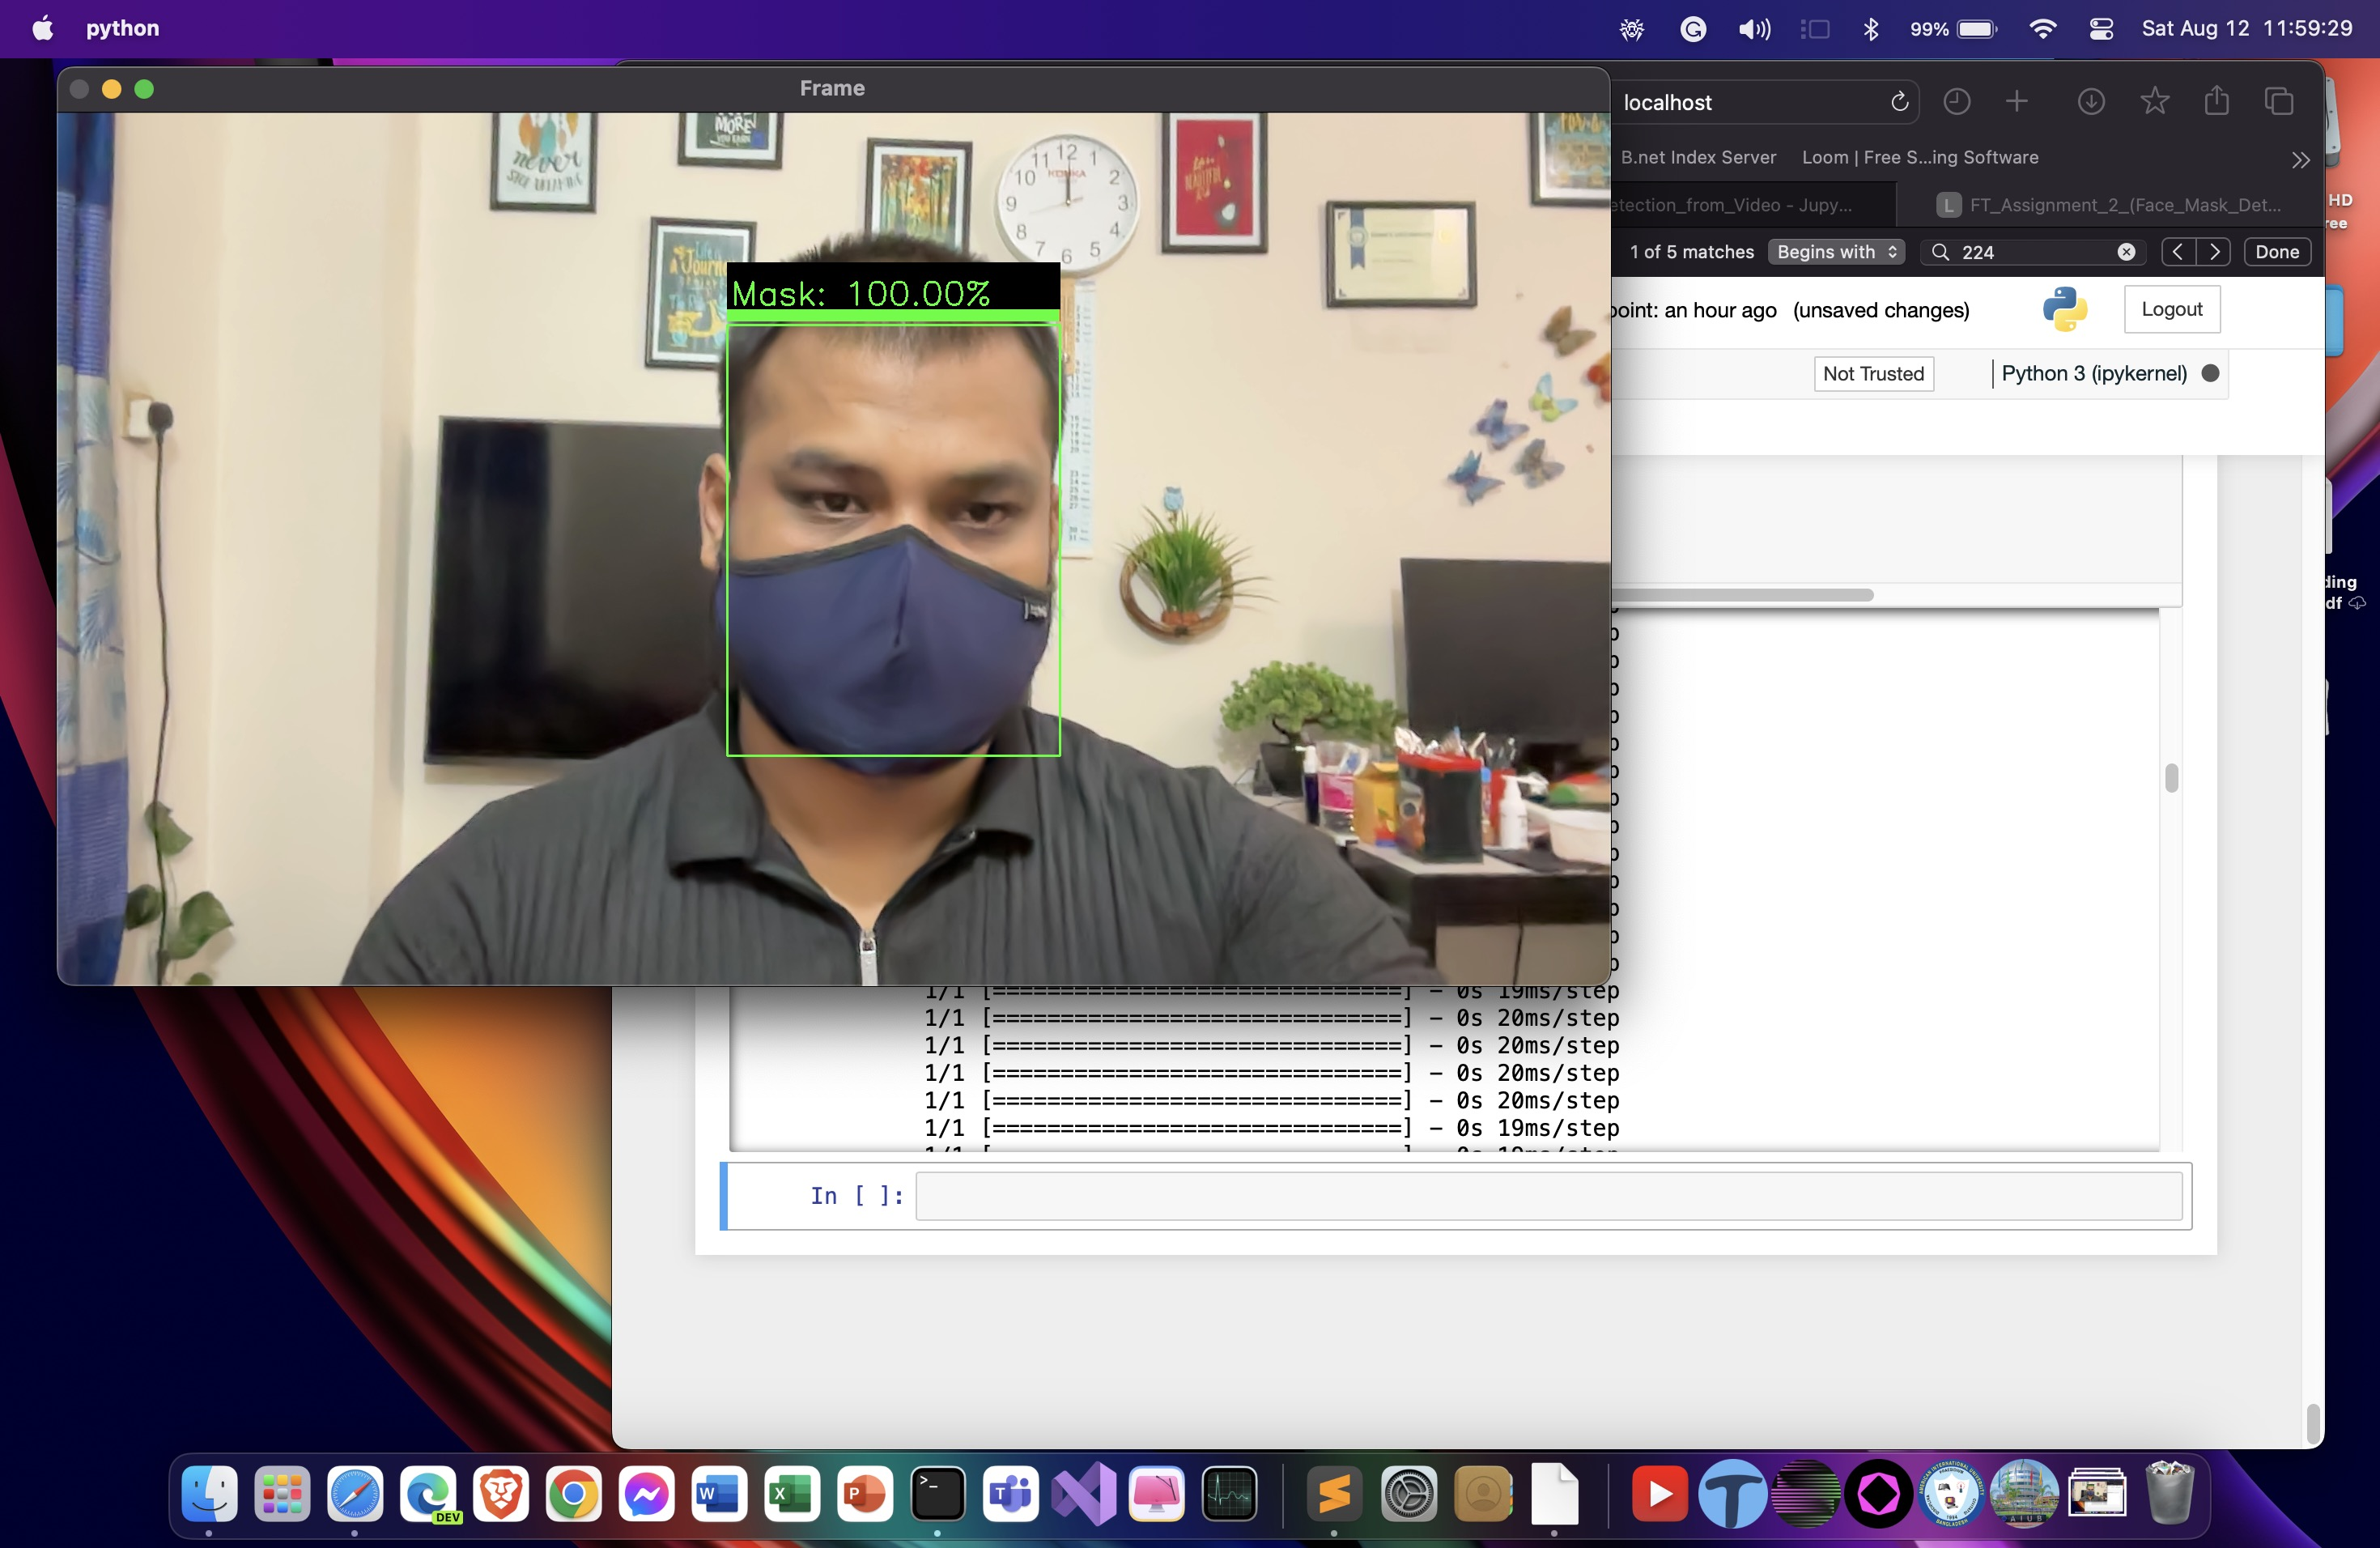

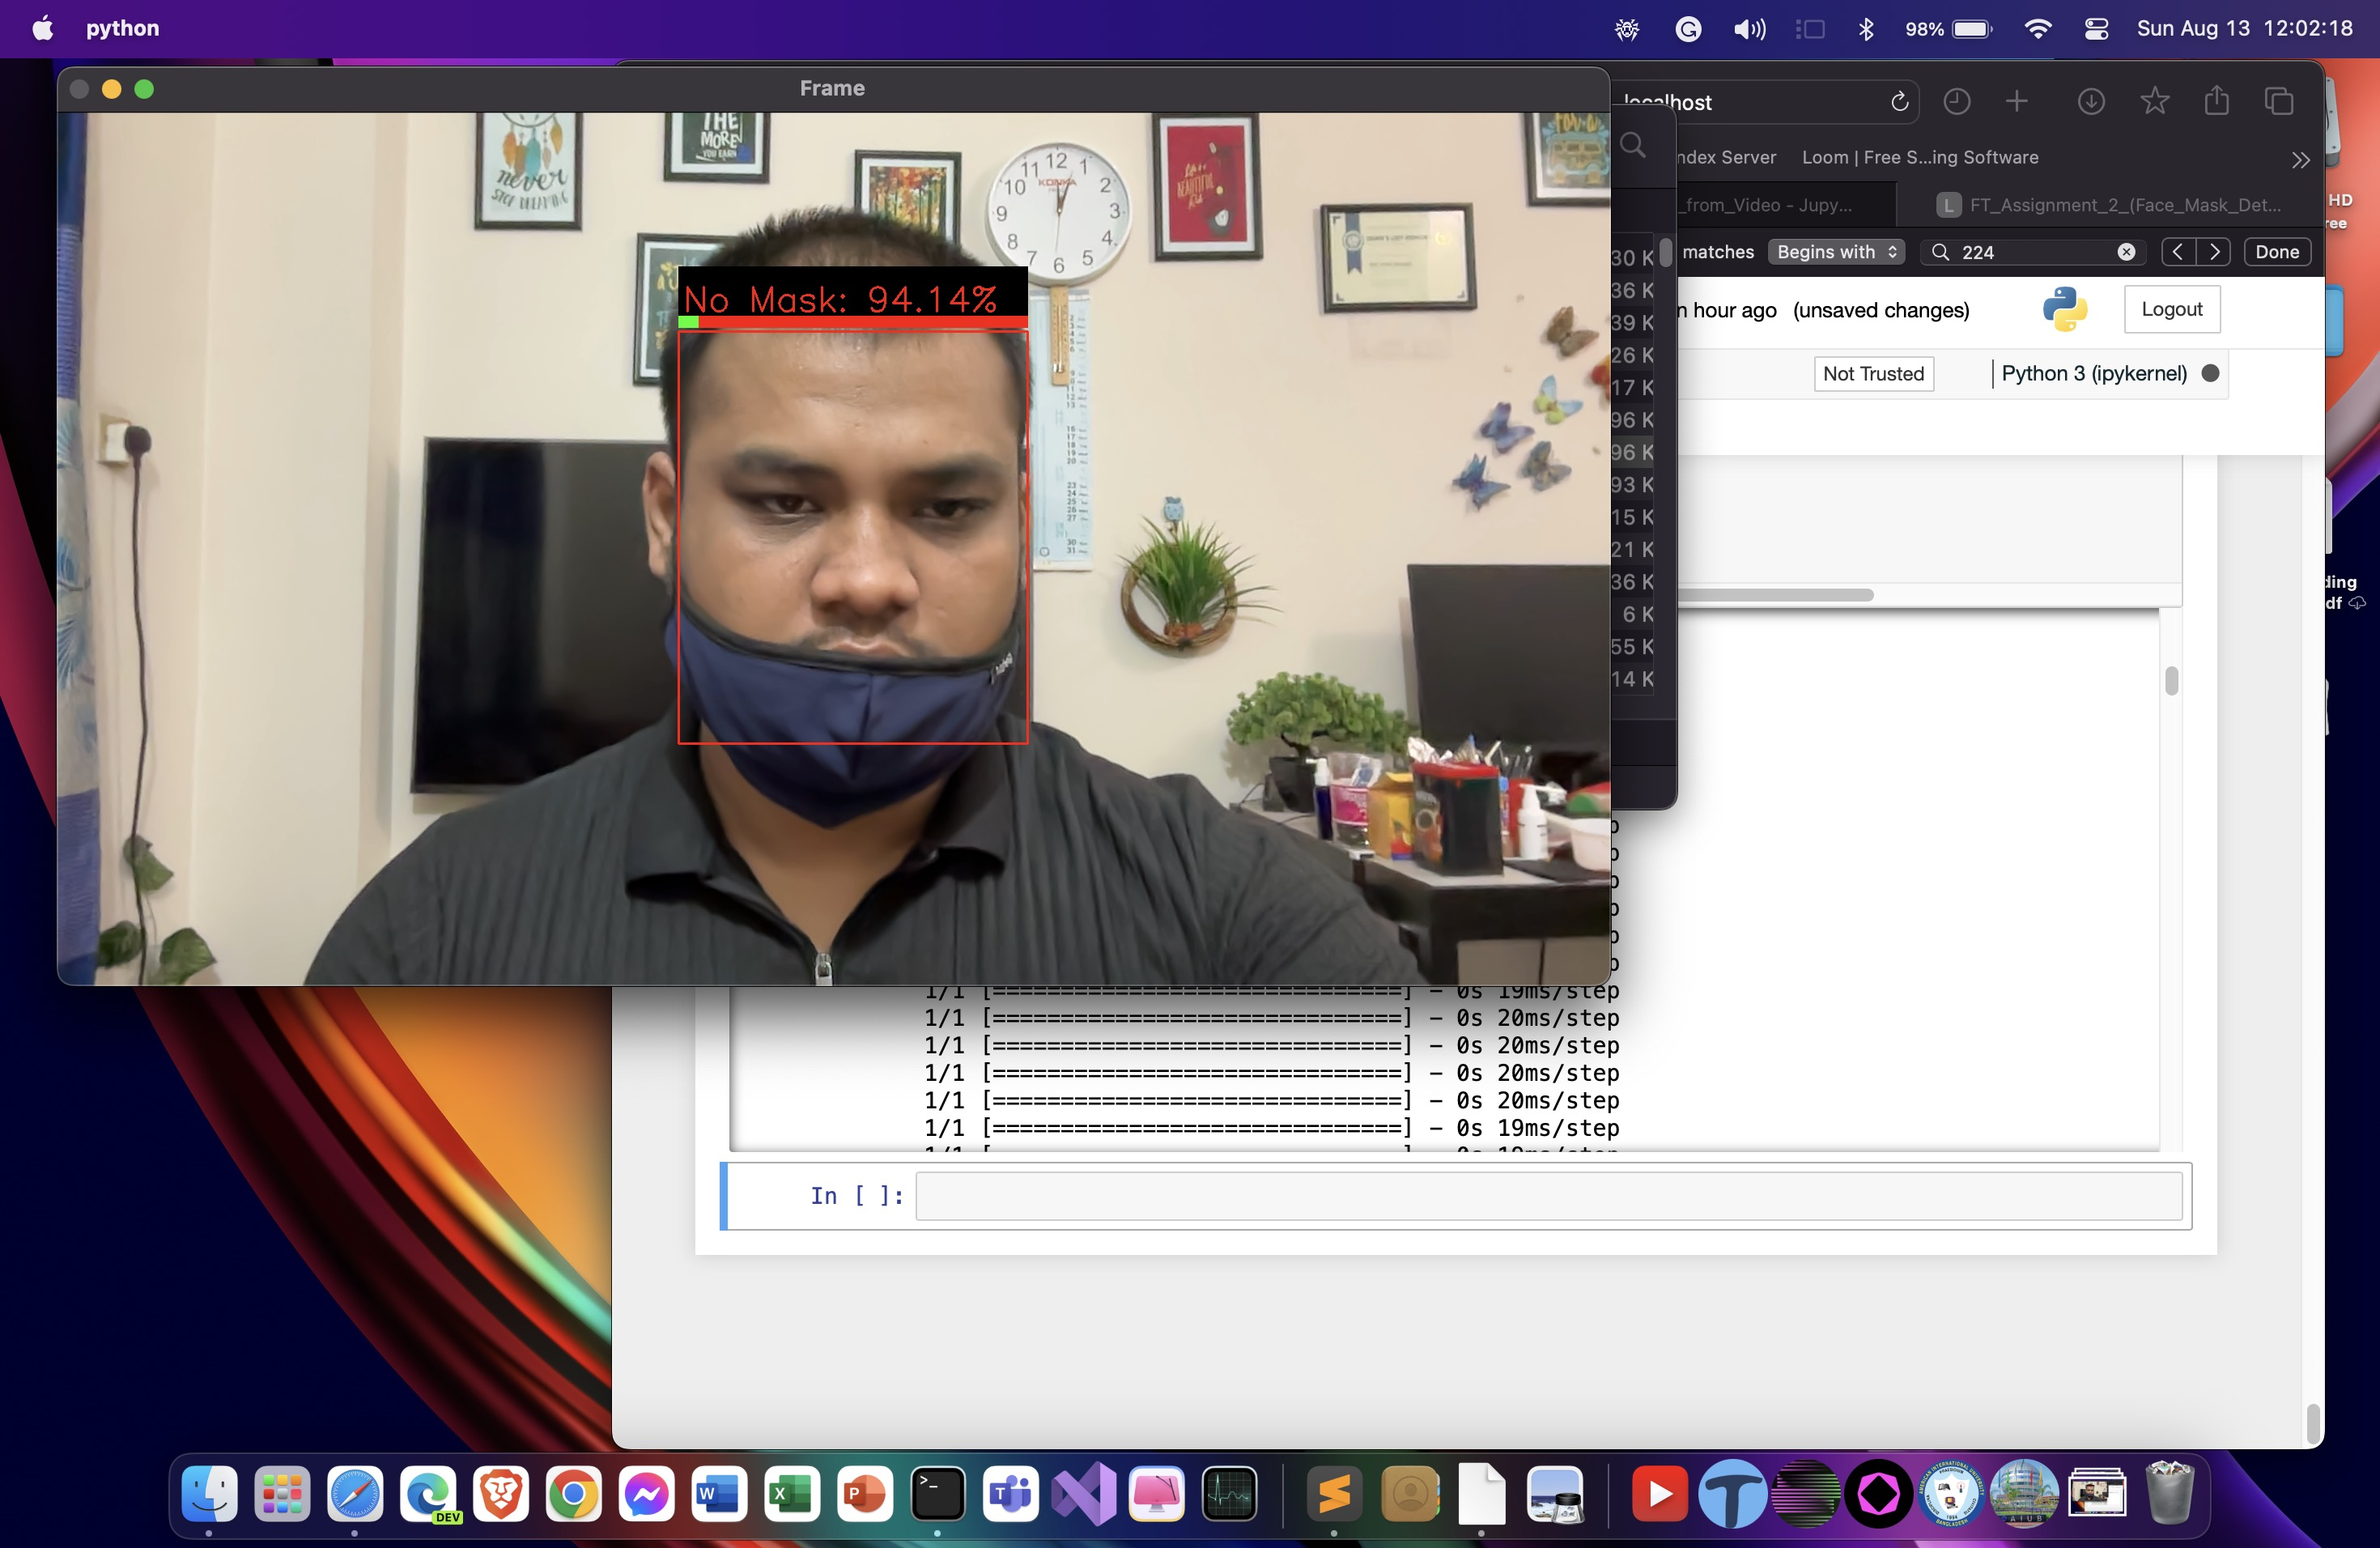

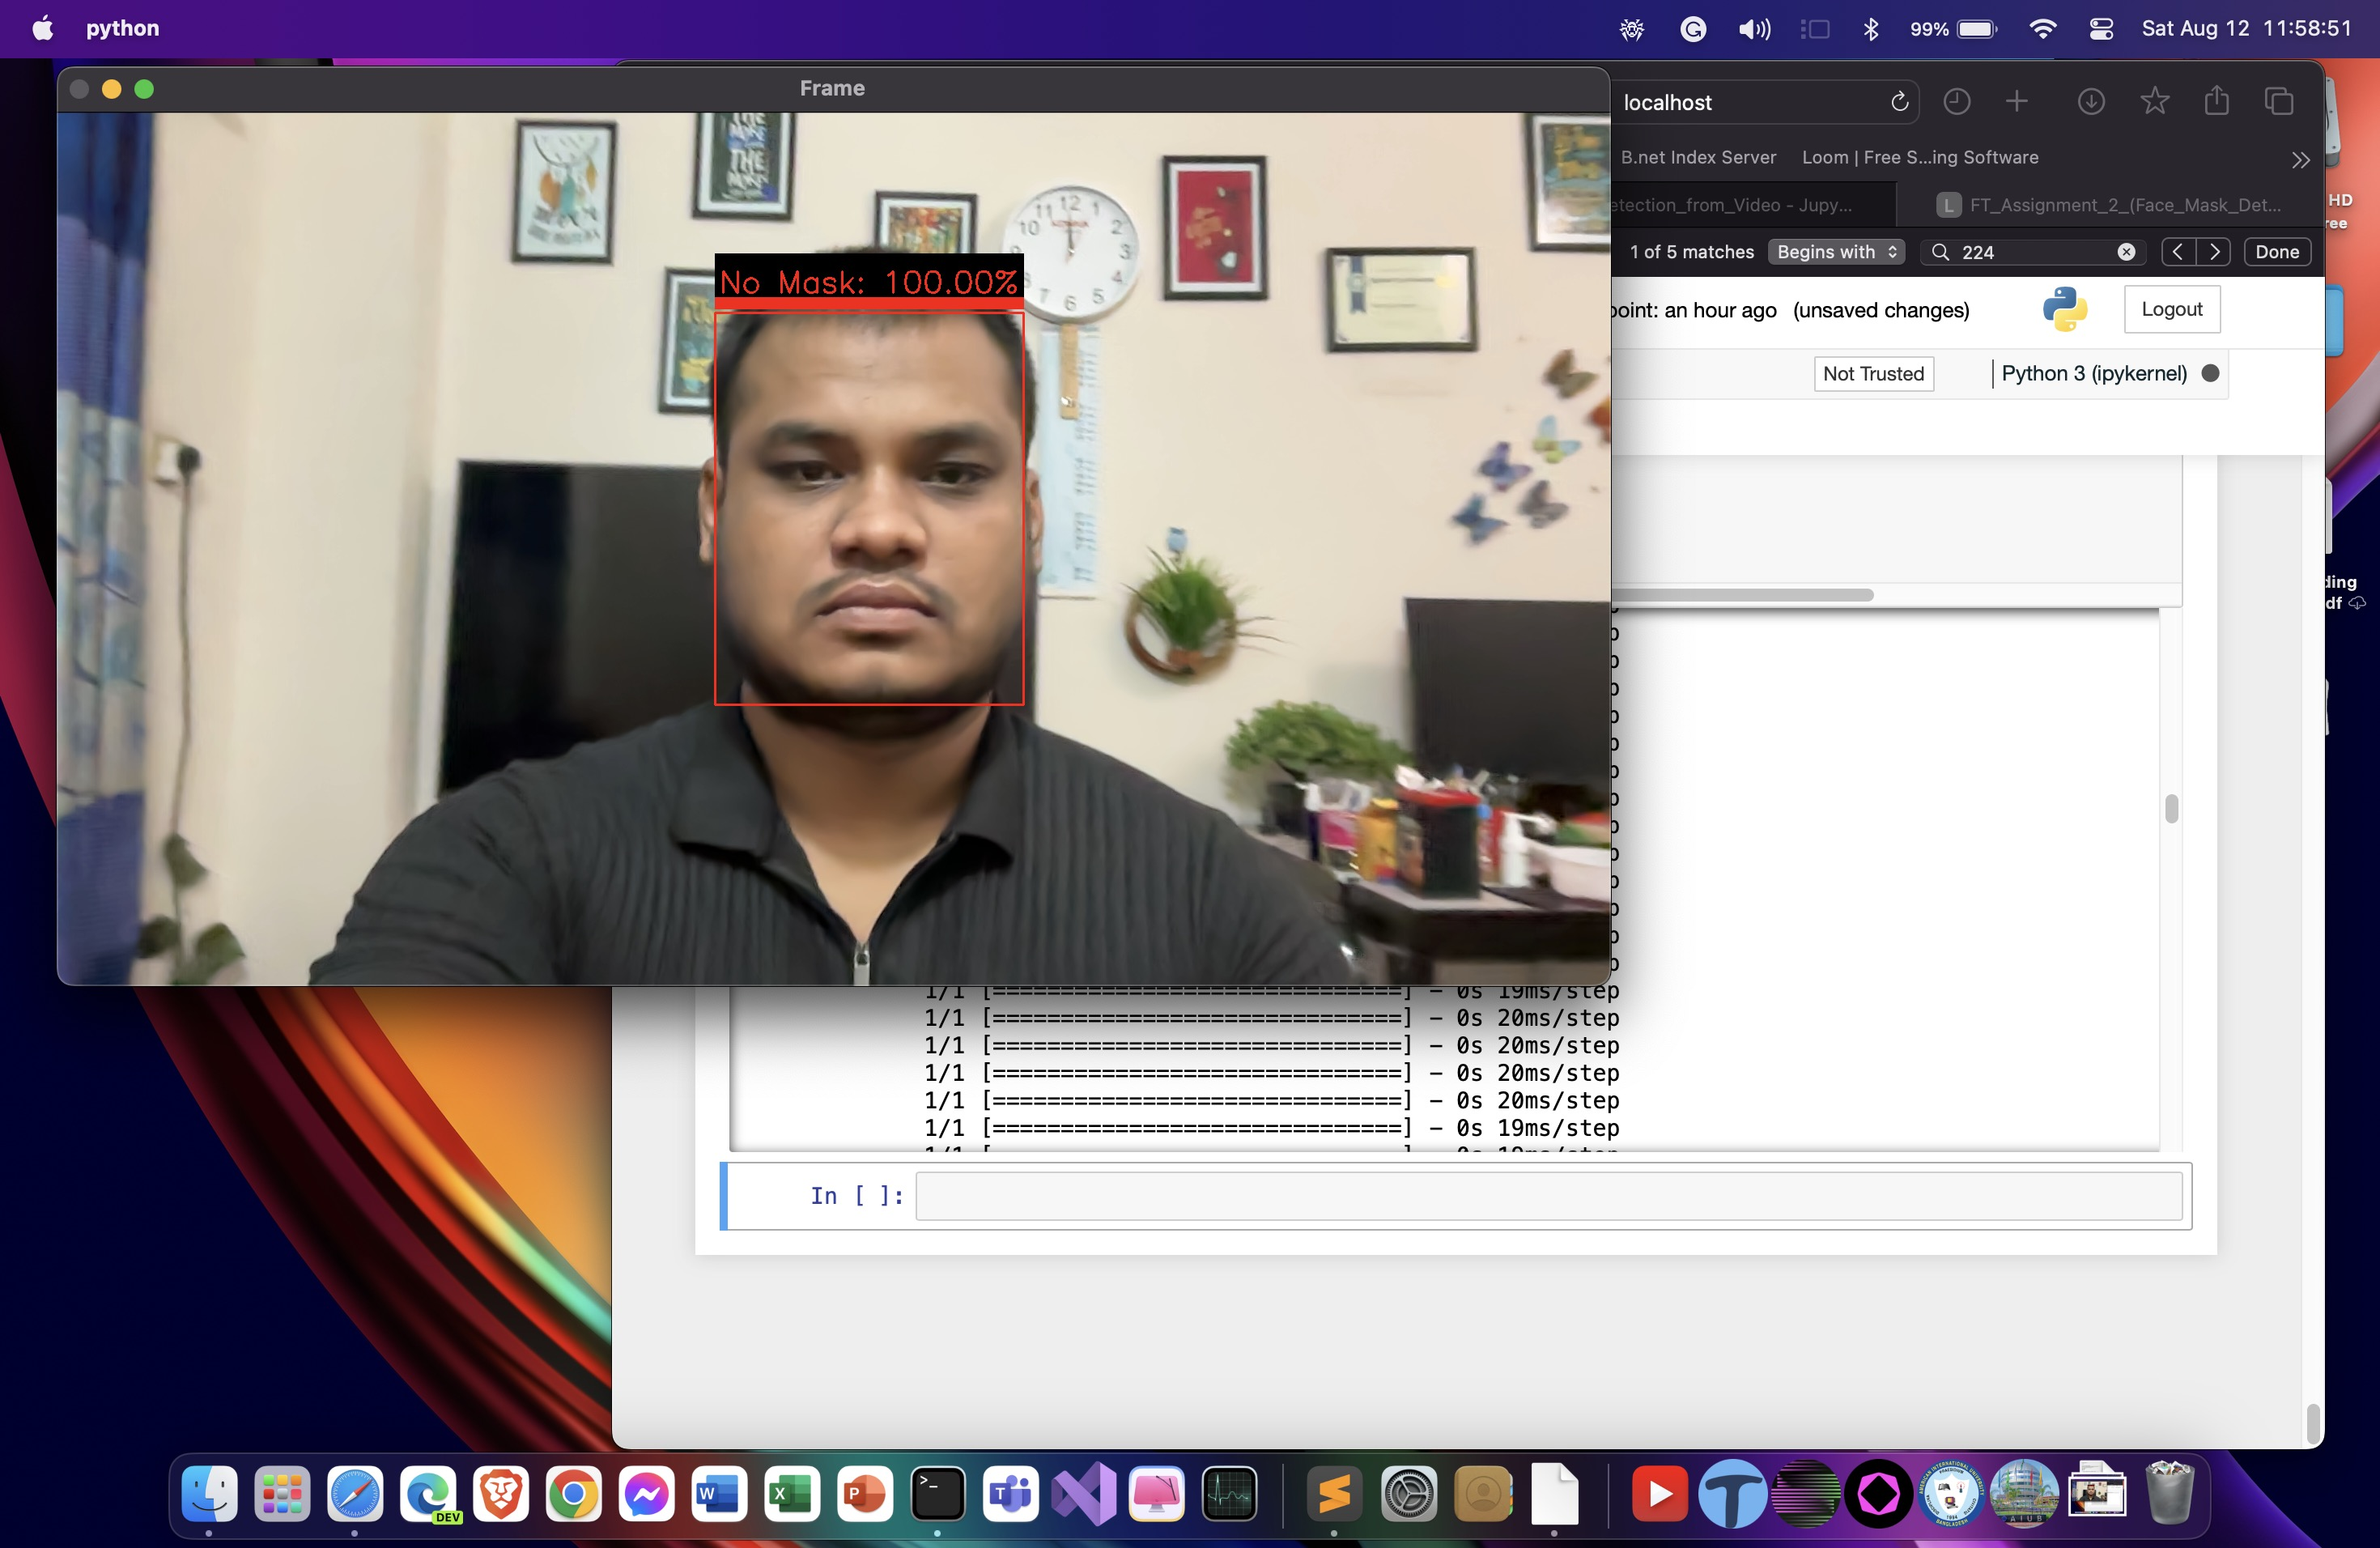

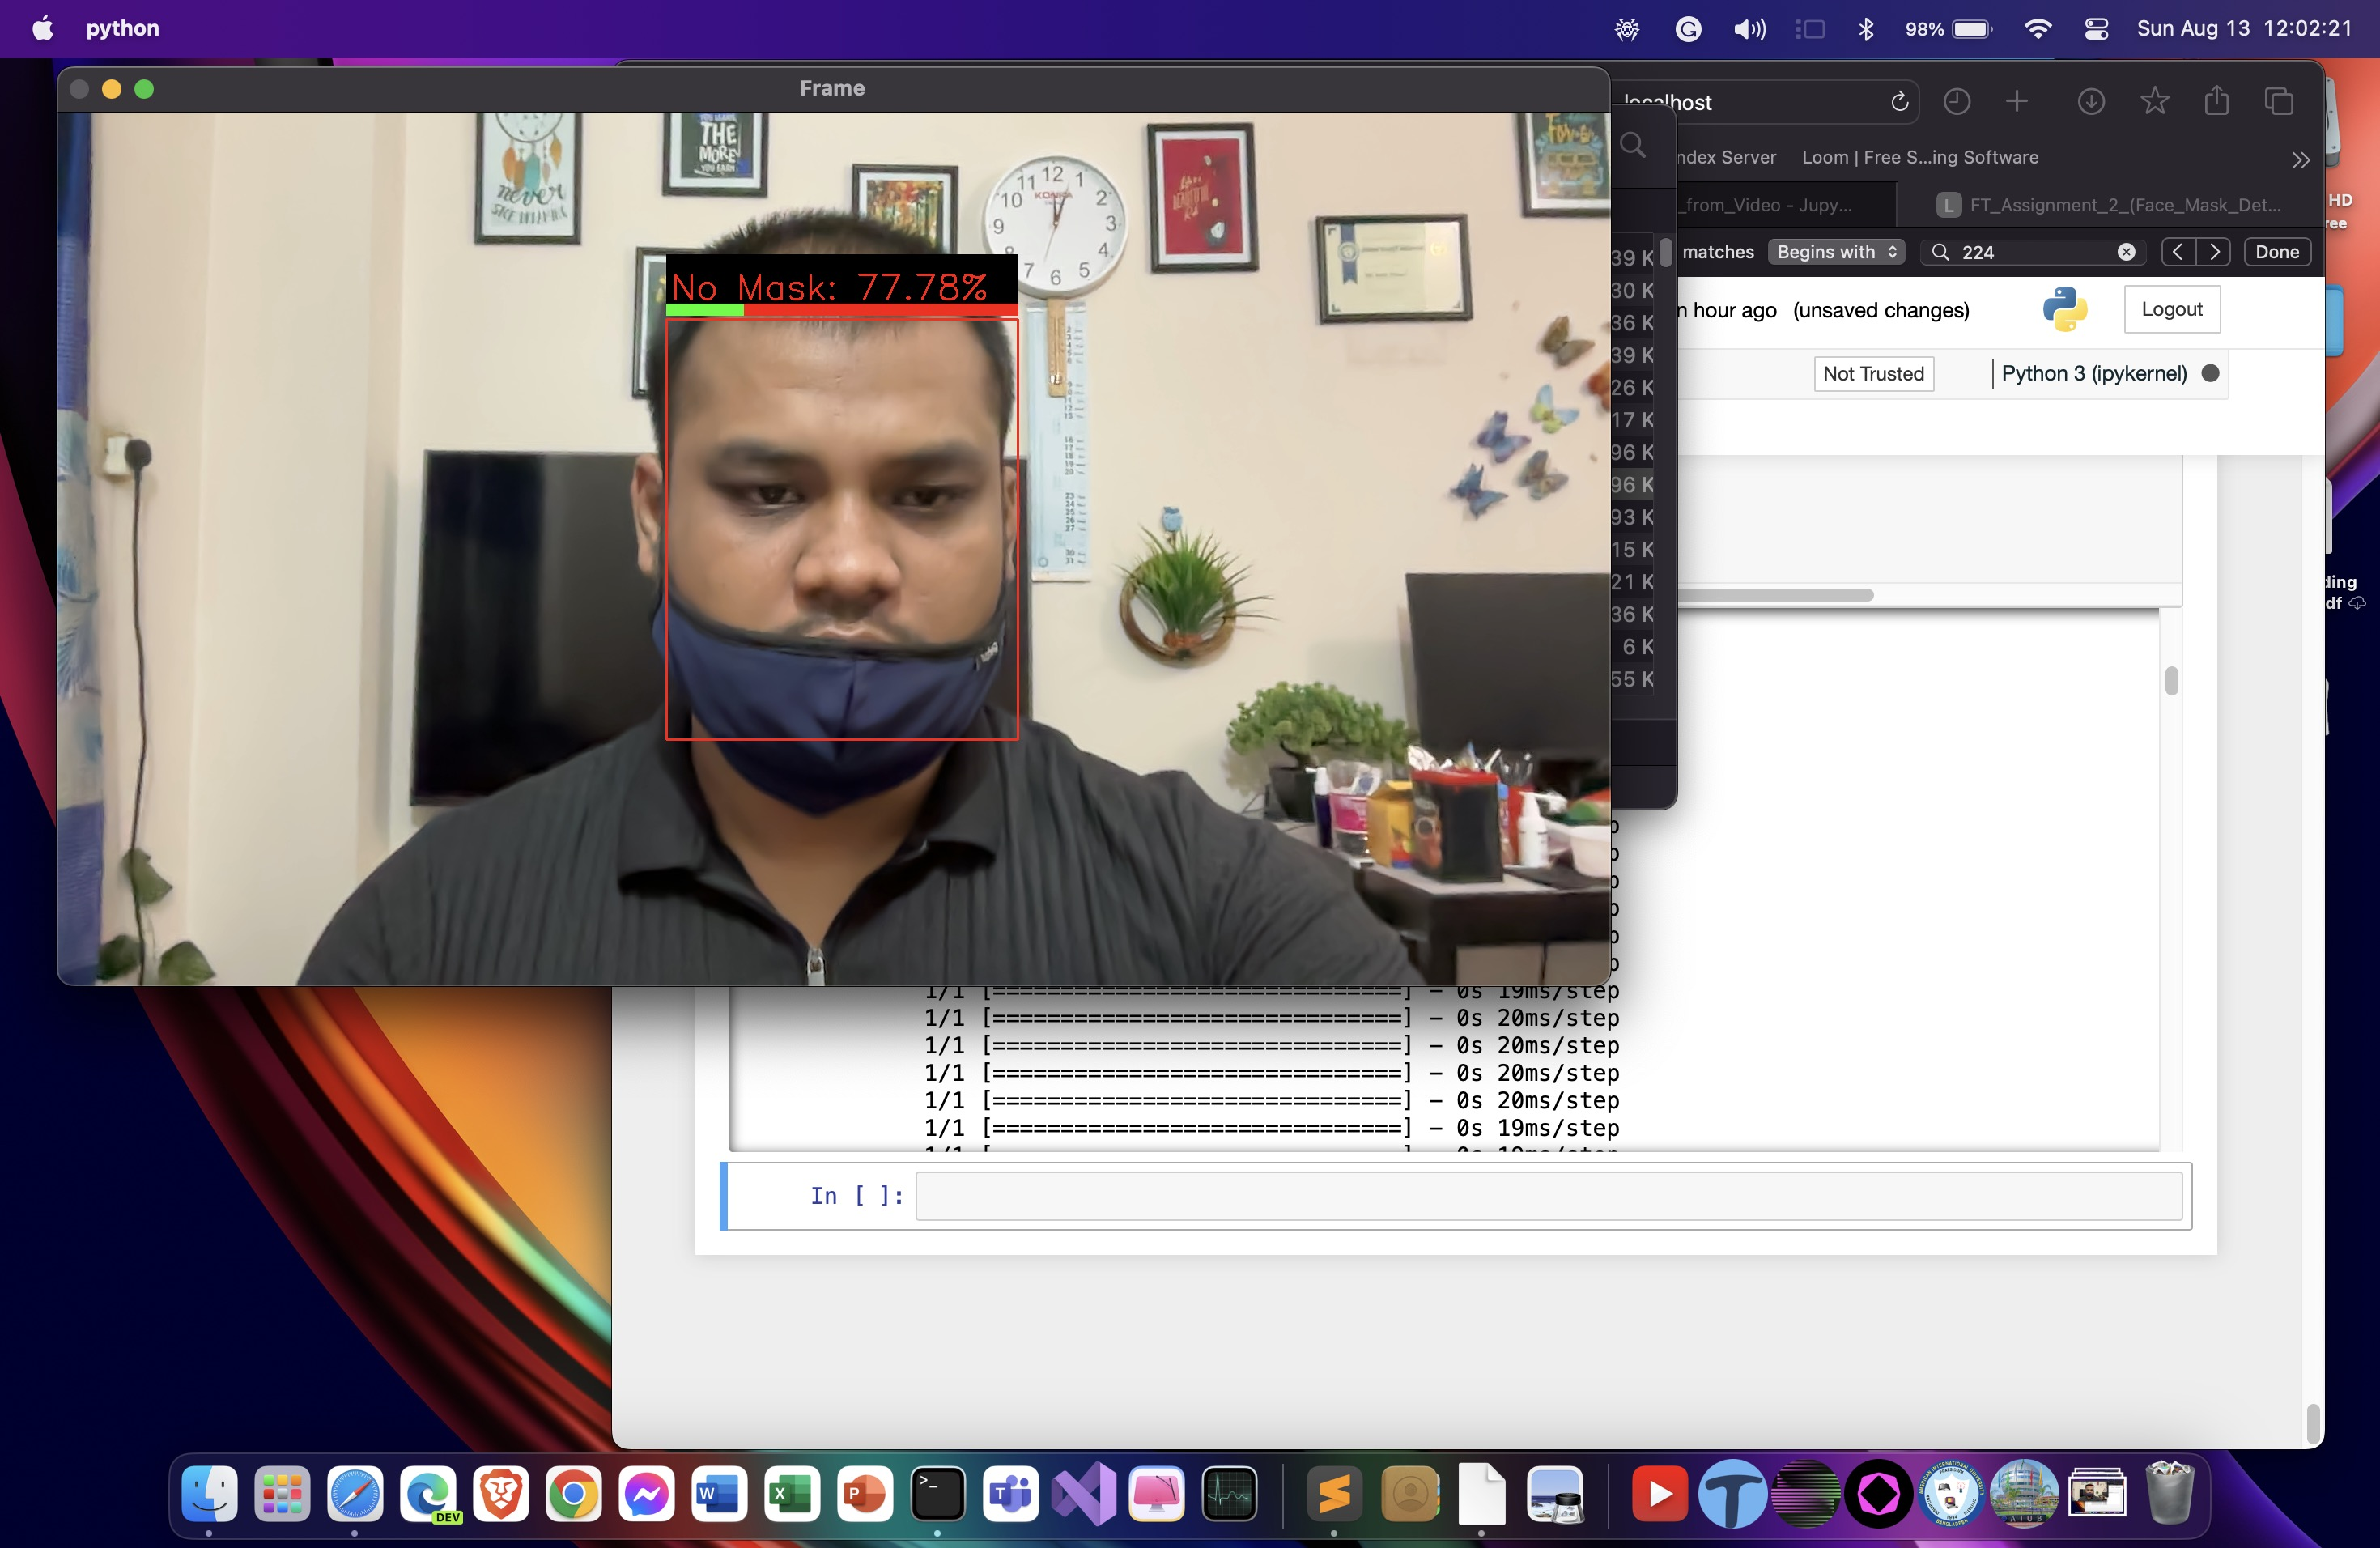

In [7]:

import os
from IPython.display import display, Image

# Path to the folder containing images
image_folder = 'Screenshot'

# Get a list of image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display each image using IPython.display.Image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    display(Image(filename=image_path))
    
    


# **Conclusion:**

The code done on this assignment is for real-time face mask detection system using a pre-trained face detection model and a mask detection model MobileNetV2. Firstly a MobileNetV2 model was trained and saved for mask detecton. Secondly The code captures frames from a video stream, detects faces in each frame, and predicts whether the individuals in the frame are wearing masks or not. The predictions are displayed on the frames, along with visual indicators.



# **Discussion:**

The script demonstrates a practical application of computer vision and machine learning in the context of public health and safety. It utilizes deep learning models for accurate face detection and mask prediction. The face detection model identifies faces in the frame, and the mask detection model predicts whether each detected face is wearing a mask or not.

The output of the script consists of labeled frames that indicate whether individuals are wearing masks, along with the corresponding probabilities. The script also outputs the current time for each frame, which could be useful for tracking and logging purposes.

Potential improvements and considerations:
1. **Performance Optimization:** Depending on the hardware, the real-time performance might vary. Optimizing the code for faster execution or utilizing hardware acceleration can enhance the real-time aspect.
2. **Accuracy and Robustness:** The accuracy of mask detection is crucial. Continuous training with diverse datasets can improve the model's robustness and generalization.
4. **User Interface:** Integrating this script into a graphical user interface (GUI) can make it more user-friendly, allowing users to start/stop the detection process easily.
5. **Deployment:** If the script is intended for deployment, ensuring proper exception handling and error management is crucial to ensure its stability.
6. **Privacy:** Face detection and analysis involve privacy concerns. Ensuring compliance with privacy regulations and guidelines is important.
7. **Remote Access:** Adding functionality to access the live feed remotely could extend the script's usability.

This implementation of real-time face mask detection using deep learning, offering potential benefits in various settings such as public spaces, healthcare facilities, and workplaces to promote safety and mask-wearing compliance.